In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data and droping columns
df = pd.read_csv('data/vehical.csv')
df.drop(columns=['Title', "Brand", "Car/Suv", "Location", "Engine", "ColourExtInt"], inplace=True)
df.dropna(inplace=True)

# Converting to int/float
def from_cat_to_num(df: pd.DataFrame, col: str, dtypes) -> pd.DataFrame:
    if dtypes == int:
        df[col] = df[col].str.replace('[^0-9]', '', regex=True).astype(dtypes)
    else:
       df[col] = df[col].str.extract(r'(\d+\.?\d*)').astype(float)

int_cols = ['Kilometres', 'Price', 'Year']
int_cols_xyz = ['Seats', 'Doors', 'CylindersinEngine']
float_cols = ['FuelConsumption']

for col in int_cols_xyz:
    from_cat_to_num(df, col, int)

for col in float_cols:
    from_cat_to_num(df, col, float)
        
# Build a mask to remove "-" values from df
mask = df.apply(lambda col: col.astype(str).str.contains('-')).any(axis=1)
df = df[~mask]
# Removing all "POA" values from Price column
df = df[df['Price'] != 'POA'].reset_index(drop=True)

for col in int_cols:
    df[col] = df[col].astype(int)

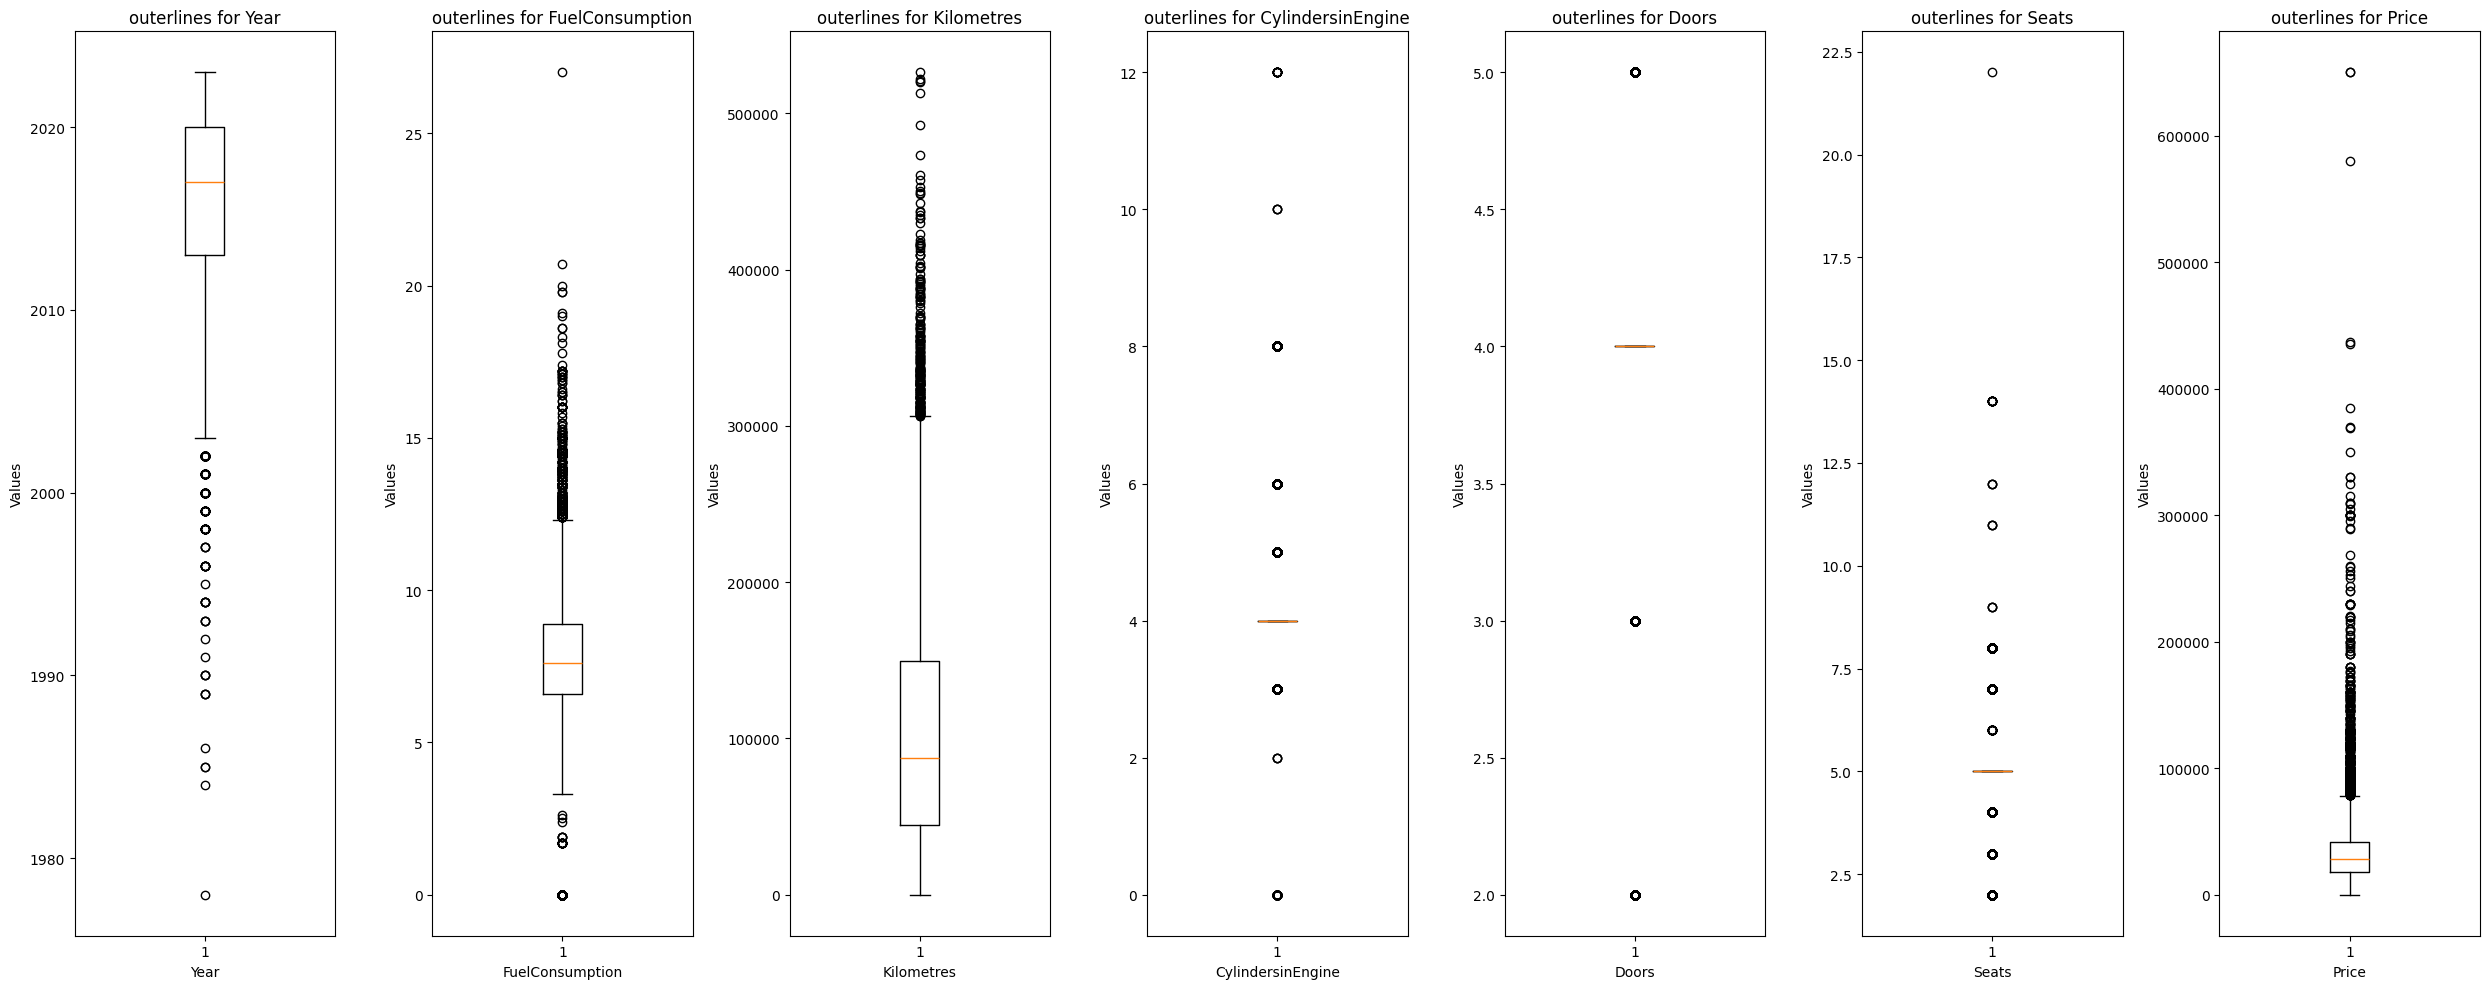

In [3]:
# Outliers
numerical_cols = ['Year', 'FuelConsumption', "Kilometres", "CylindersinEngine", "Doors", "Seats", "Price"]

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(25, 10))

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])    
    axes[i].set_title(f'outerlines for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Values")

plt.tight_layout()
plt.show()

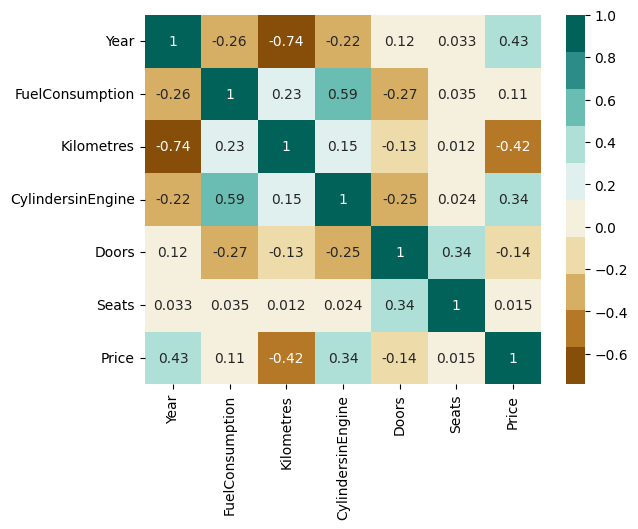

In [4]:
# Correlation Heatmap
correlation = df.corr(numeric_only=True)
colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlation, cmap=colormap, annot=True)

plt.show()

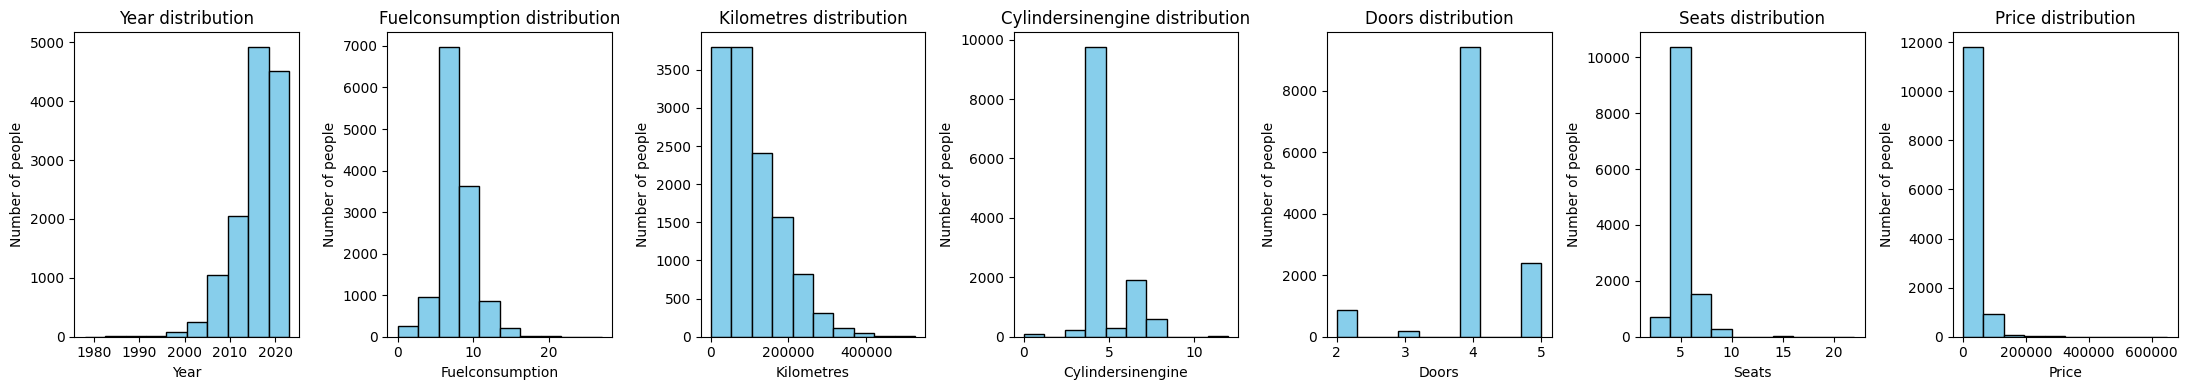

In [10]:
numerical_data = df[numerical_cols]
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(22, 4))

for i, col in enumerate(numerical_cols):
    axes[i].hist(numerical_data[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col.capitalize()} distribution')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Number of people')
    
plt.tight_layout()
plt.show()

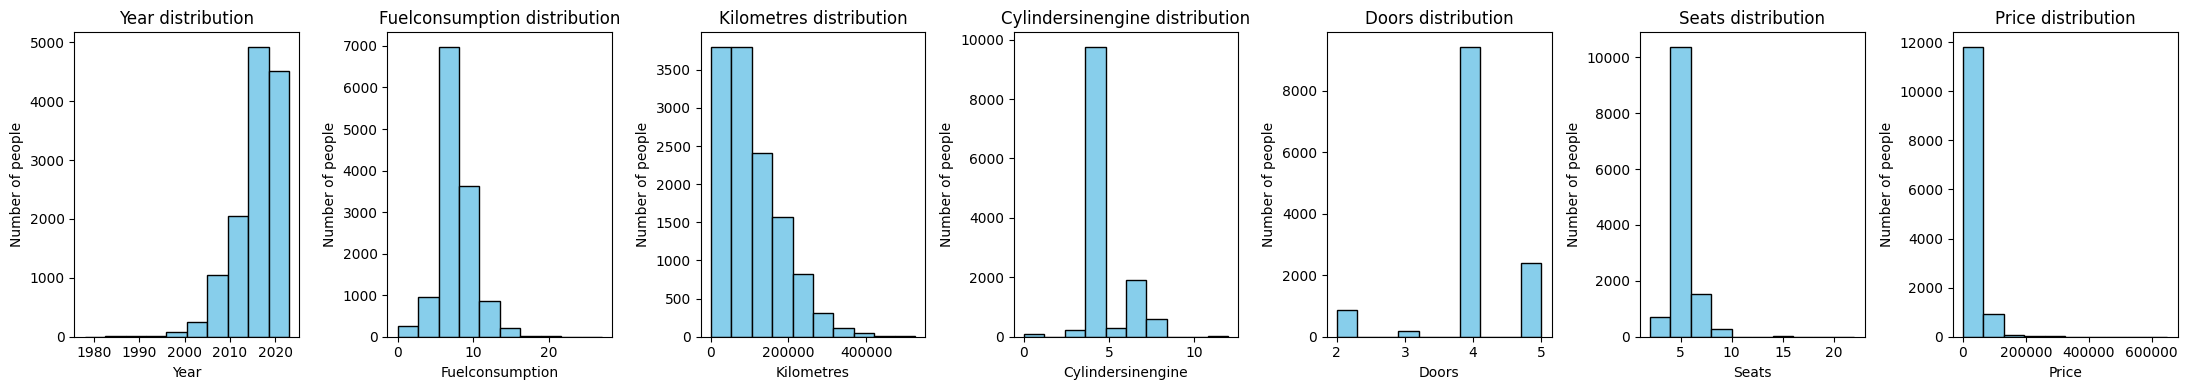

In [14]:
categorical_data = df[["UsedOrNew", "Transmission", "DriveType", "FuelType", "BodyType"]]
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(22, 4))

for i, col in enumerate(numerical_cols):
    axes[i].hist(numerical_data[col], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col.capitalize()} distribution')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Number of people')
    
plt.tight_layout()
plt.show()